In [1]:
import pandas as pd
import numpy as np

df_diabetes = pd.read_csv('diabetes.csv')
print(df_diabetes.shape)
df_diabetes.describe().transpose()

(768, 9)


,count,mean,std,min,25%,50%,75%,max
Pregnancies,768.0,3.845052,3.369578,0.000,1.00000,3.0000,6.00000,17.00
Glucose,768.0,120.894531,31.972618,0.000,99.00000,117.0000,140.25000,199.00
BloodPressure,768.0,69.105469,19.355807,0.000,62.00000,72.0000,80.00000,122.00
SkinThickness,768.0,20.536458,15.952218,0.000,0.00000,23.0000,32.00000,99.00
Insulin,768.0,79.799479,115.244002,0.000,0.00000,30.5000,127.25000,846.00
BMI,768.0,31.992578,7.884160,0.000,27.30000,32.0000,36.60000,67.10
DiabetesPedigreeFunction,768.0,0.471876,0.331329,0.078,0.24375,0.3725,0.62625,2.42
Age,768.0,33.240885,11.760232,21.000,24.00000,29.0000,41.00000,81.00
Diabetes,768.0,0.348958,0.476951,0.000,0.00000,0.0000,1.00000,1.00


In [2]:
target_column = ['Diabetes'] 
predictors = list(set(list(df_diabetes.columns))-set(target_column))
print(predictors)

['BMI', 'Age', 'BloodPressure', 'SkinThickness', 'Pregnancies', 'Glucose', 'Insulin', 'DiabetesPedigreeFunction']


In [3]:
from sklearn.preprocessing import StandardScaler
transformer = StandardScaler()

df_std = df_diabetes.copy()

df_std[predictors] = transformer.fit_transform(df_diabetes[predictors])
df_std.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
Pregnancies,768.0,-6.476301e-17,1.000652,-1.141852,-0.844885,-0.250952,0.639947,3.906578
Glucose,768.0,-9.251859e-18,1.000652,-3.783654,-0.685236,-0.121888,0.605771,2.444478
BloodPressure,768.0,1.503427e-17,1.000652,-3.572597,-0.367337,0.149641,0.563223,2.734528
SkinThickness,768.0,1.006140e-16,1.000652,-1.288212,-1.288212,0.154533,0.719086,4.921866
Insulin,768.0,-3.006854e-17,1.000652,-0.692891,-0.692891,-0.428062,0.412008,6.652839
BMI,768.0,2.590520e-16,1.000652,-4.060474,-0.595578,0.000942,0.584771,4.455807
DiabetesPedigreeFunction,768.0,2.451743e-16,1.000652,-1.189553,-0.688969,-0.300128,0.466227,5.883565
Age,768.0,1.931325e-16,1.000652,-1.041549,-0.786286,-0.360847,0.660206,4.063716
Diabetes,768.0,3.489583e-01,0.476951,0.000000,0.000000,0.000000,1.000000,1.000000


In [4]:
from sklearn.model_selection import train_test_split

X_std = df_std[predictors].values
y_std = df_std[target_column].values

X_train_std, X_test_std, y_train_std, y_test_std = train_test_split(X_std, y_std, test_size=0.30, random_state=12)
print(X_train_std.shape)
print(X_test_std.shape)

(537, 8)
(231, 8)


In [5]:
#Específico do Keras
from tensorflow import keras
from tensorflow.keras import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.utils import to_categorical

#Métricas
from sklearn.metrics import classification_report,confusion_matrix
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix
%matplotlib inline

In [6]:
# one hot encode outputs
y_train_std_cat = to_categorical(y_train_std)
y_test_std_cat = to_categorical(y_test_std)

Train on 537 samples
Epoch 1/20
537/537 [==============================] - 1s 2ms/sample - loss: 0.5834 - accuracy: 0.7151
Epoch 2/20
537/537 [==============================] - 0s 152us/sample - loss: 0.4602 - accuracy: 0.7747
Epoch 3/20
537/537 [==============================] - 0s 132us/sample - loss: 0.4383 - accuracy: 0.7765
Epoch 4/20
537/537 [==============================] - 0s 176us/sample - loss: 0.4309 - accuracy: 0.7821
Epoch 5/20
537/537 [==============================] - 0s 199us/sample - loss: 0.4096 - accuracy: 0.8045 - loss: 0.3952 - accuracy: 0.81
Epoch 6/20
537/537 [==============================] - ETA: 0s - loss: 0.3921 - accuracy: 0.80 - 0s 227us/sample - loss: 0.4040 - accuracy: 0.7970
Epoch 7/20
537/537 [==============================] - 0s 213us/sample - loss: 0.4026 - accuracy: 0.8119
Epoch 8/20
537/537 [==============================] - 0s 198us/sample - loss: 0.3825 - accuracy: 0.8101
Epoch 9/20
537/537 [==============================] - 0s 140us/sample - los

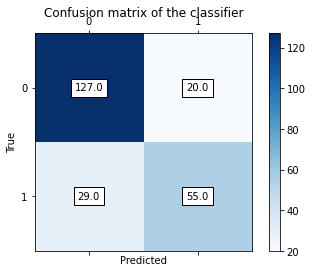

In [7]:
mlp_std = Sequential()
mlp_std.add(Dense(500, activation='relu', input_dim=8))
mlp_std.add(Dense(100, activation='relu'))
mlp_std.add(Dense(50, activation='relu'))
mlp_std.add(Dense(2, activation='softmax'))

mlp_std.compile(optimizer='adam',
                loss='categorical_crossentropy',               
                metrics=['accuracy'])

mlp_std.fit(X_train_std, y_train_std_cat, epochs=20, verbose=1)
predict_test_std = mlp_std.predict_classes(X_test_std)

print()
print(classification_report(y_test_std,predict_test_std))
print()

cnf_mtx = confusion_matrix(y_test_std,predict_test_std)

fig = plt.figure()
ax = fig.add_subplot(111)
cax = ax.matshow(cnf_mtx, cmap=plt.cm.Blues)
plt.title('Confusion matrix of the classifier')
fig.colorbar(cax)

for (i, j), z in np.ndenumerate(cnf_mtx):
    ax.text(j, i, '{:0.1f}'.format(z), ha='center', va='center', bbox=dict(facecolor='white'))

ax.set_xticklabels([''] + [0,1])
ax.set_yticklabels([''] + [0,1])
plt.xlabel('Predicted')
plt.ylabel('True')
plt.show()

In [8]:
from sklearn.preprocessing import Normalizer
transformer = Normalizer()

df_norm = df_diabetes.copy()

df_norm[predictors] = transformer.fit_transform(df_diabetes[predictors])
df_norm.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
Pregnancies,768.0,0.022645,0.020956,0.00000,0.006476,0.016716,0.033330,0.117208
Glucose,768.0,0.682903,0.161166,0.00000,0.587637,0.704501,0.801606,0.973682
BloodPressure,768.0,0.402801,0.153428,0.00000,0.317522,0.430685,0.511070,0.848036
SkinThickness,768.0,0.112086,0.092546,0.00000,0.000000,0.114464,0.181524,0.419691
Insulin,768.0,0.318921,0.338570,0.00000,0.000000,0.249215,0.632833,0.970458
BMI,768.0,0.186874,0.063402,0.00000,0.146291,0.186167,0.226831,0.400734
DiabetesPedigreeFunction,768.0,0.002710,0.001902,0.00025,0.001379,0.002159,0.003507,0.013417
Age,768.0,0.195434,0.080940,0.03246,0.139930,0.181108,0.239313,0.616539
Diabetes,768.0,0.348958,0.476951,0.00000,0.000000,0.000000,1.000000,1.000000


In [9]:
from sklearn.model_selection import train_test_split

X_norm = df_norm[predictors].values
y_norm = df_norm[target_column].values

X_train_norm, X_test_norm, y_train_norm, y_test_norm = train_test_split(X_norm, y_norm, test_size=0.30, random_state=12)
print(X_train_norm.shape)
print(X_test_norm.shape)

(537, 8)
(231, 8)


In [10]:
# one hot encode outputs
y_train_norm_cat = to_categorical(y_train_norm)
y_test_norm_cat = to_categorical(y_test_norm)


              precision    recall  f1-score   support

           0       0.72      0.85      0.78       147
           1       0.62      0.43      0.51        84

    accuracy                           0.70       231
   macro avg       0.67      0.64      0.64       231
weighted avg       0.69      0.70      0.68       231




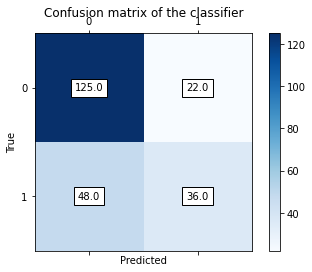

In [11]:
mlp_norm = Sequential()
mlp_norm.add(Dense(500, activation='relu', input_dim=8))
mlp_norm.add(Dense(100, activation='relu'))
mlp_norm.add(Dense(50, activation='relu'))
mlp_norm.add(Dense(2, activation='softmax'))

mlp_norm.compile(optimizer='adam',
                loss='categorical_crossentropy',               
                metrics=['accuracy'])

mlp_norm.fit(X_train_norm, y_train_norm_cat, epochs=20, verbose=0)
predict_test_norm = mlp_norm.predict_classes(X_test_norm)

print()
print(classification_report(y_test_norm, predict_test_norm))
print()

cnf_mtx = confusion_matrix(y_test_norm, predict_test_norm)

fig = plt.figure()
ax = fig.add_subplot(111)
cax = ax.matshow(cnf_mtx, cmap=plt.cm.Blues)
plt.title('Confusion matrix of the classifier')
fig.colorbar(cax)

for (i, j), z in np.ndenumerate(cnf_mtx):
    ax.text(j, i, '{:0.1f}'.format(z), ha='center', va='center', bbox=dict(facecolor='white'))

ax.set_xticklabels([''] + [0,1])
ax.set_yticklabels([''] + [0,1])
plt.xlabel('Predicted')
plt.ylabel('True')
plt.show()

In [12]:
import tensorflow as tf
tf.__version__

'2.1.0'